In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)

In [2]:
df= pd.read_csv("vgsales.csv")
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [3]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [4]:
#Dropping all NaN values (there are no unknown numeric values. All NaN values come from the categorical data.)
df=df.dropna()
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

Text(0.5, 0, 'Genre')

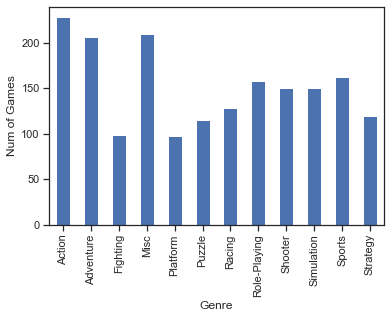

In [5]:
type_of_games = df.groupby('Genre')['Publisher'].nunique().plot(kind='bar')
type_of_games .set_ylabel("Num of Games")
type_of_games .set_xlabel("Genre")

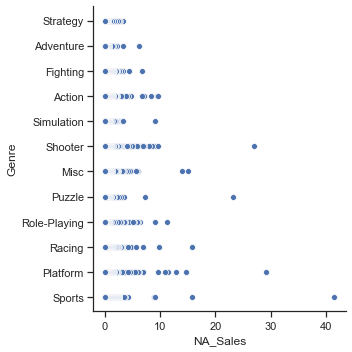

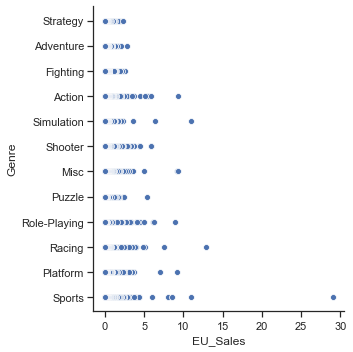

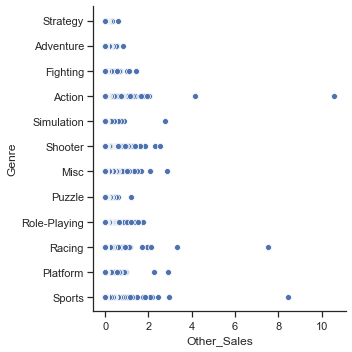

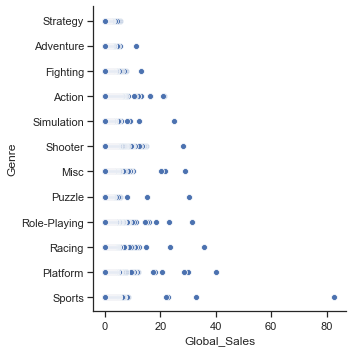

In [6]:
## Comparing sales across the different Genres
sns.relplot(x="NA_Sales", y="Genre", data=df);
#plt.savefig('NA_Sles.png')
sns.relplot(x="EU_Sales", y="Genre", data=df);
#plt.savefig('EU_Sales.png')
sns.relplot(x="Other_Sales", y="Genre", data=df);
#plt.savefig('Other_Sales.png')
sns.relplot(x="Global_Sales", y="Genre", data=df);
#plt.savefig('Global_Sales.png')

In [7]:
##From the graphs we can see that sports have the highest amount of sales
##Soo.. lets keep digging and figure out what that outlier is

In [8]:
#Digging into sports 
df_Sports = df.loc[df['Genre']=="Sports"]
len(df_Sports)
df_Sports

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
13,14,Wii Fit,Wii,2007.0,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72
14,15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00
77,78,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
85,86,Mario & Sonic at the Olympic Games,Wii,2007.0,Sports,Sega,2.58,3.90,0.66,0.91,8.06
112,113,FIFA 14,PS3,2013.0,Sports,Electronic Arts,0.78,4.32,0.07,1.73,6.90
117,118,Zumba Fitness,Wii,2010.0,Sports,505 Games,3.50,2.64,0.00,0.67,6.81
121,122,FIFA 12,PS3,2011.0,Sports,Electronic Arts,0.84,4.32,0.11,1.42,6.69
124,125,FIFA 15,PS4,2014.0,Sports,Electronic Arts,0.79,4.29,0.05,1.47,6.59


In [9]:
#That one outlier is Wii Sports

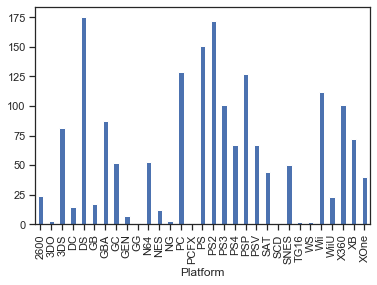

In [10]:
##Trying to figure out who the most popular publisher is
df.groupby('Platform')['Publisher'].nunique().plot(kind='bar')

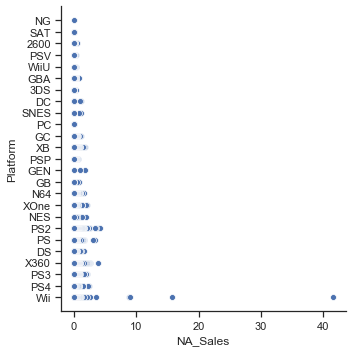

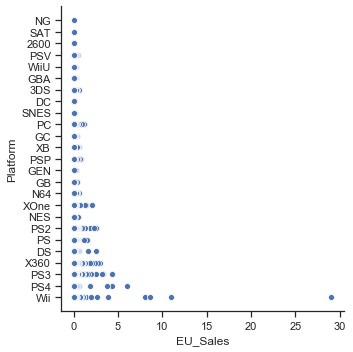

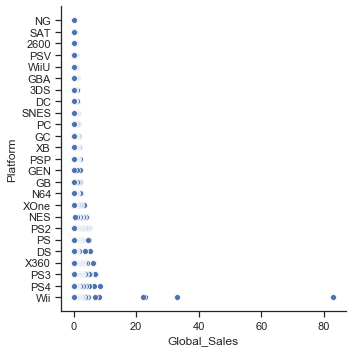

In [11]:
#Which platform makes the most sales?
sns.relplot(x="NA_Sales", y="Platform", data=df_Sports);
    #plt.savefig('NA_Sles_Sports.png')
sns.relplot(x="EU_Sales", y="Platform", data=df_Sports);
    #plt.savefig('EU_Sales_Sports.png')
sns.relplot(x="Global_Sales", y="Platform", data=df_Sports);
    #plt.savefig('Global_Sales_Sports.png')

Text(0, 0.5, 'Sales')

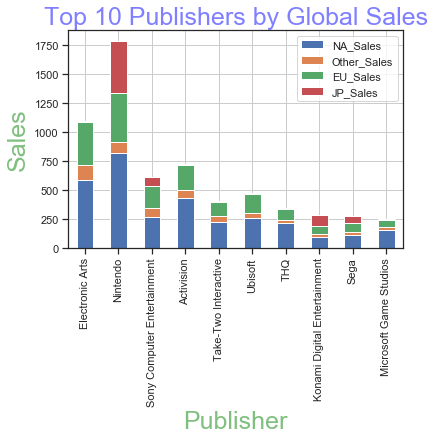

In [12]:
global_sales_publisher = df.pivot_table(index=['Publisher'], values=['Other_Sales','NA_Sales','EU_Sales','JP_Sales'], 
                                           aggfunc=np.sum).sort_values(['Other_Sales'], ascending=False)
global_sales_publisher = global_sales_publisher[['NA_Sales','Other_Sales','EU_Sales','JP_Sales']]
ax = global_sales_publisher.iloc[0:10,:].plot(kind='bar', stacked=True, grid=True)
ax.set_title('Top 10 Publishers by Global Sales', size=25, color='blue', alpha=0.5)
ax.set_xlabel('Publisher', size=25, color='green', alpha=0.5)
ax.set_ylabel('Sales', size=25, color='green', alpha=0.5)

In [13]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


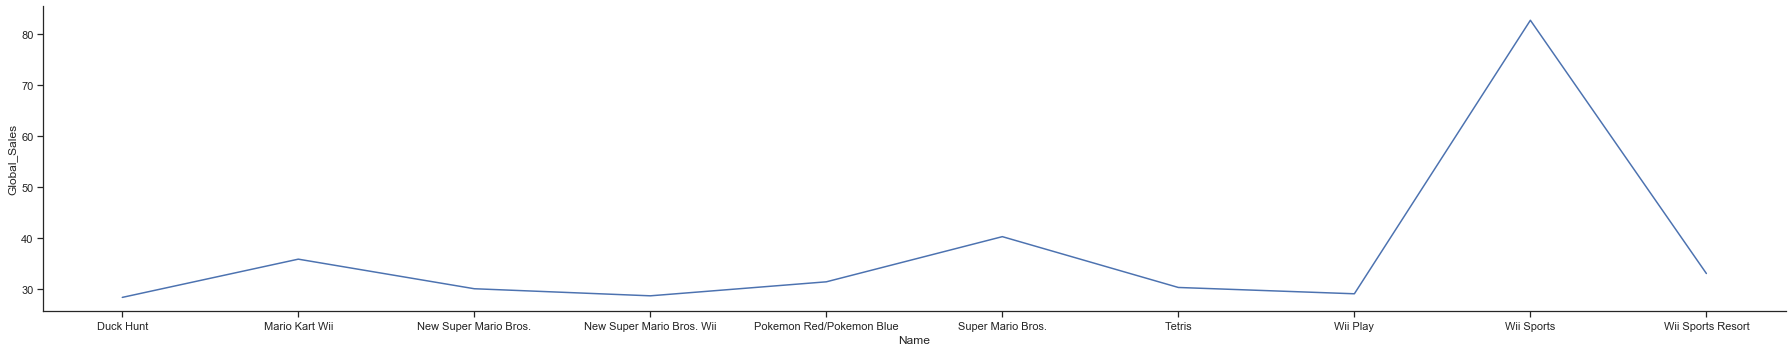

In [14]:
top_10 = df[:10:]
top_10
sns.relplot(x="Name", y="Global_Sales", height=5, aspect=5, kind="line", data=top_10)

['Shooter' 'Misc' 'Action' 'Sports' 'Fighting' 'Puzzle' 'Racing'
 'Platform' 'Simulation' 'Adventure' 'Role-Playing' 'Strategy']


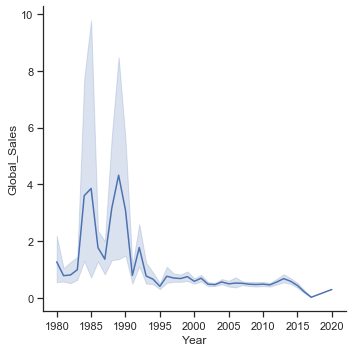

In [15]:
dfs = df.sort_values("Year", axis = 0, ascending = True,inplace = True, na_position ='last')
print(df.Genre.unique())
##All Genres
sns.relplot(x="Year", y="Global_Sales", kind="line", data=df)
#plt.savefig('pop_all.png')

Number of  Sports games made =  2304


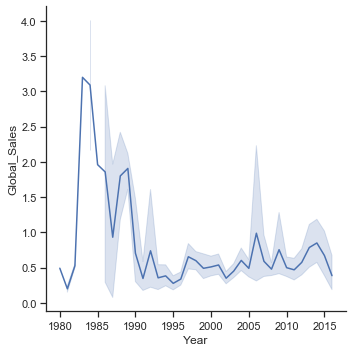

In [16]:
#With only sports 
#df_sports = df.loc[df['Genre']=="Sports"]
sns.relplot(x="Year", y="Global_Sales", kind="line", data=df_Sports)
#plt.savefig('pop_Sports.png')
print("Number of  Sports games made = ", len(df_Sports))

Number of  Fighting games made =  1686


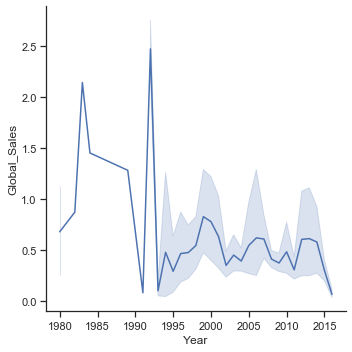

In [17]:
#With only Misc 
df_Misc = df.loc[df['Genre']=="Misc"]
sns.relplot(x="Year", y="Global_Sales", kind="line", data=df_Misc)
#plt.savefig('pop_Misc.png')
print("Number of  Fighting games made = ", len(df_Misc))

Number of  Fighting games made =  836


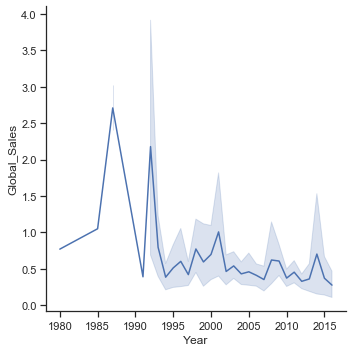

In [18]:
#With only Fighting 
df_Fighting = df.loc[df['Genre']=="Fighting"]
sns.relplot(x="Year", y="Global_Sales", kind="line", data=df_Fighting)
#plt.savefig('pop_Fighting.png')
print("Number of  Fighting games made = ", len(df_Fighting))

Number of  Action games made =  3251


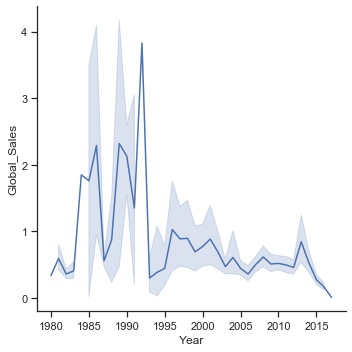

In [19]:
#With only Action 
df_Action = df.loc[df['Genre']=="Action"]
sns.relplot(x="Year", y="Global_Sales", kind="line", data=df_Action)
#plt.savefig('pop_Action.png')
print("Number of  Action games made = ", len(df_Action))

Number of Shooter games made =  1282


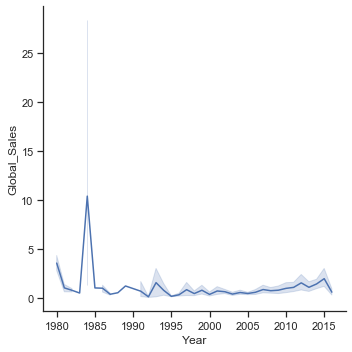

In [20]:
#With only Shooter 
df_Shooter = df.loc[df['Genre']=="Shooter"]
sns.relplot(x="Year", y="Global_Sales", kind="line", data=df_Shooter)
#plt.savefig('pop_Shooter.png')
print("Number of Shooter games made = ", len(df_Shooter))

Number of Puzzle games made =  570


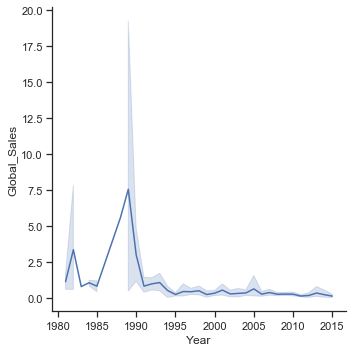

In [21]:
#With only Puzzle
df_Puzzle = df.loc[df['Genre']=="Puzzle"]
sns.relplot(x="Year", y="Global_Sales", kind="line", data=df_Puzzle)
#plt.savefig('pop_Puzzle.png')
print("Number of Puzzle games made = ", len(df_Puzzle))

Number of Platform games made =  875


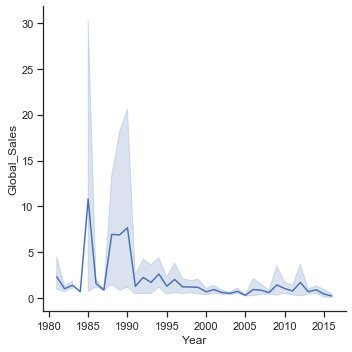

In [22]:
#With only Platform
df_Platform = df.loc[df['Genre']=="Platform"]
sns.relplot(x="Year", y="Global_Sales", kind="line", data=df_Platform)
#plt.savefig('pop_Platform.png')
print("Number of Platform games made = ", len(df_Platform))

Number of Simulation games made =  848


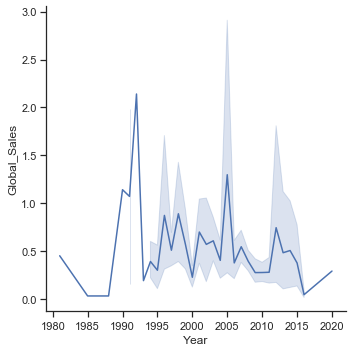

In [23]:
#With only Simulation
df_Simulation = df.loc[df['Genre']=="Simulation"]
sns.relplot(x="Year", y="Global_Sales", kind="line", data=df_Simulation)
#plt.savefig('pop_Simulation.png')
print("Number of Simulation games made = ", len(df_Simulation))

Number of Racing games made =  1225


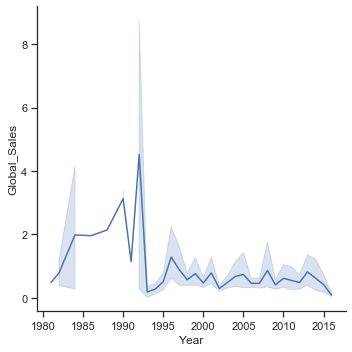

In [24]:
#With only Racing
df_Racing = df.loc[df['Genre']=="Racing"]
sns.relplot(x="Year", y="Global_Sales", kind="line", data=df_Racing)
#plt.savefig('pop_Racing.png')
print("Number of Racing games made = ", len(df_Racing))

Number of Adventure games made =  1274


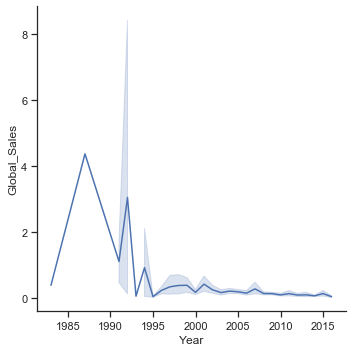

In [25]:
#With only Adventure
df_Adventure = df.loc[df['Genre']=="Adventure"]
sns.relplot(x="Year", y="Global_Sales", kind="line", data=df_Adventure)
#plt.savefig('pop_Adventure.png')
print("Number of Adventure games made = ", len(df_Adventure))

Number of RolePlaying games made =  1470


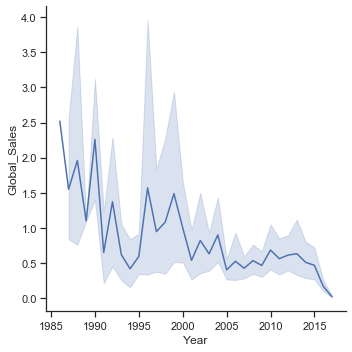

In [26]:
#With only Role-Playing
df_RolePlaying = df.loc[df['Genre']=="Role-Playing"]
sns.relplot(x="Year", y="Global_Sales", kind="line", data=df_RolePlaying)
#plt.savefig('pop_Role-Playing.png')
print("Number of RolePlaying games made = ", len(df_RolePlaying))

Number of Strategy games made =  670


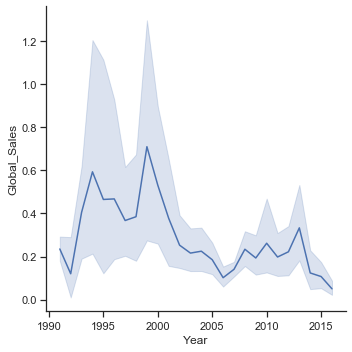

In [27]:
#With only Strategy
df_Strategy = df.loc[df['Genre']=="Strategy"]
sns.relplot(x="Year", y="Global_Sales", kind="line", data=df_Strategy)
#plt.savefig('pop_Strategy.png')
print("Number of Strategy games made = ", len(df_Strategy))

In [28]:
##it would appear that all games have gone down except for simulation games 
# lets go there.. 
df_Simulation
#There are pre-orders for a DS Simulation game set to release in 2020

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4346,4348,Phoenix,2600,1981.0,Simulation,Atari,0.42,0.02,0.00,0.00,0.45
14335,14338,Alter Ego,PC,1985.0,Simulation,Activision,0.00,0.03,0.00,0.01,0.03
14507,14510,SimCity,PC,1988.0,Simulation,Maxis,0.00,0.02,0.00,0.01,0.03
1792,1794,Pilotwings,SNES,1990.0,Simulation,Nintendo,0.46,0.17,0.48,0.02,1.14
855,857,SimCity,SNES,1991.0,Simulation,Nintendo,0.93,0.27,0.75,0.04,1.98
8575,8577,SimEarth: The Living Planet,SNES,1991.0,Simulation,Imagineer,0.00,0.00,0.16,0.00,0.16
765,767,SimCity 2000,PC,1992.0,Simulation,Maxis,1.20,0.84,0.00,0.10,2.14
7929,7931,Thoroughbred Breeder,SNES,1993.0,Simulation,Hect,0.00,0.00,0.19,0.00,0.19
3505,3507,Theme Park,PS,1994.0,Simulation,Electronic Arts,0.24,0.16,0.13,0.04,0.57
6229,6231,SimCity 2000,SAT,1994.0,Simulation,Sega,0.00,0.00,0.28,0.00,0.28


Text(-36.7, 0.5, 'Genre')

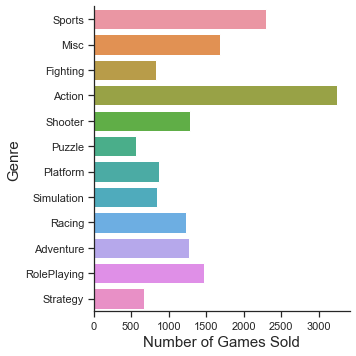

In [29]:
data = {'Name':['Sports','Misc','Fighting','Action','Shooter','Sports','Puzzle','Platform','Simulation','Racing','Adventure','RolePlaying','Strategy'],'size':[len(df_Sports),len(df_Misc),len(df_Fighting),len(df_Action),len(df_Shooter),len(df_Sports),len(df_Puzzle),len(df_Platform),len(df_Simulation),len(df_Racing),len(df_Adventure),len(df_RolePlaying),len(df_Strategy)]}
df = pd.DataFrame(data)
sns.catplot(x="size", y="Name", kind="bar", data=df)
#plt.savefig('size.png')
plt.xlabel('Number of Games Sold', fontsize=15)
plt.ylabel('Genre', fontsize=15)

In [30]:
#Action is the most popular Genre

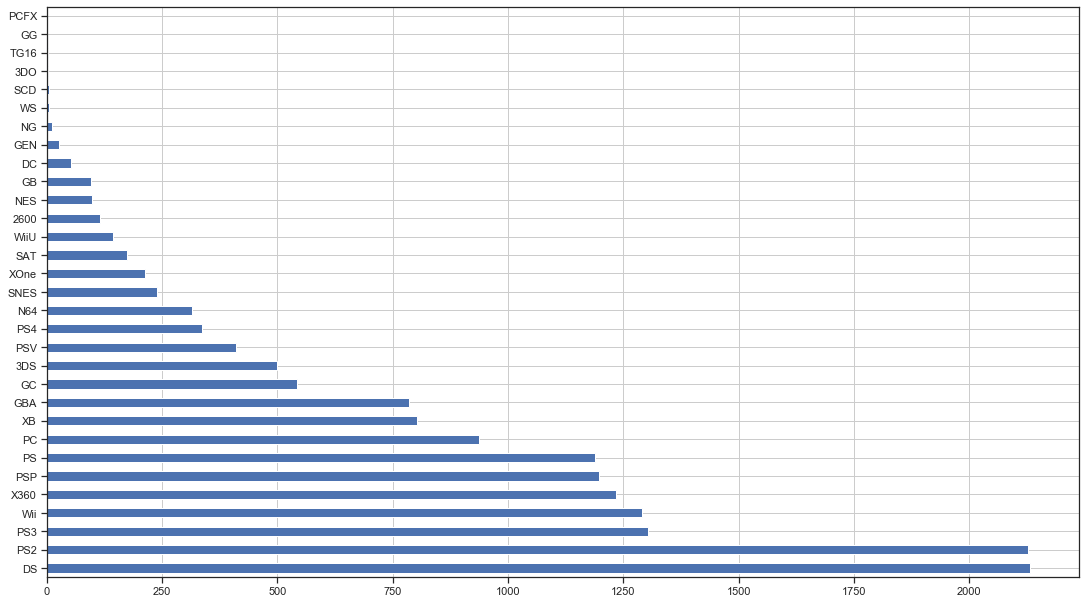

In [31]:
#Frequency plot for Platform - to find the most popular Platform (plot against Global Sales)
df2=pd.read_csv("vgsales.csv")
df2=df2.dropna()
df2['Platform'].value_counts().plot(kind='barh', grid=True)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

Text(0, 0.5, 'Platform')

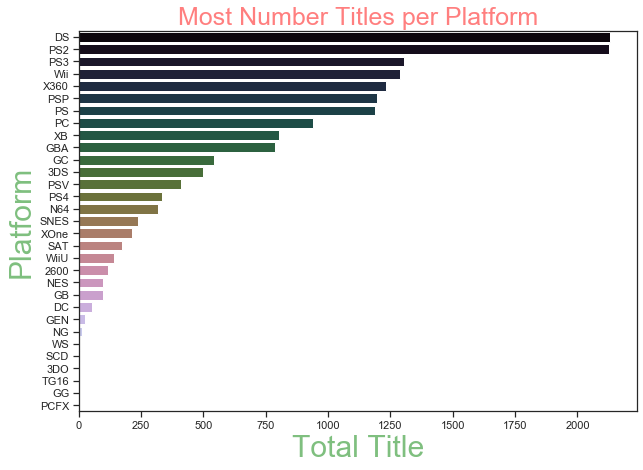

In [32]:
platform_title = df2.Platform.value_counts(sort=True)
plt.subplots(figsize=(10,7))
ax = sns.barplot(x=platform_title , y=platform_title .index, palette='cubehelix')
ax.set_title('Most Number Titles per Platform', color='red', alpha=0.5, size=25)
ax.set_xlabel('Total Title', color='green', alpha=0.5, size=30)
ax.set_ylabel('Platform', color='green', alpha=0.5, size=30)

Text(0, 0.5, 'Platform')

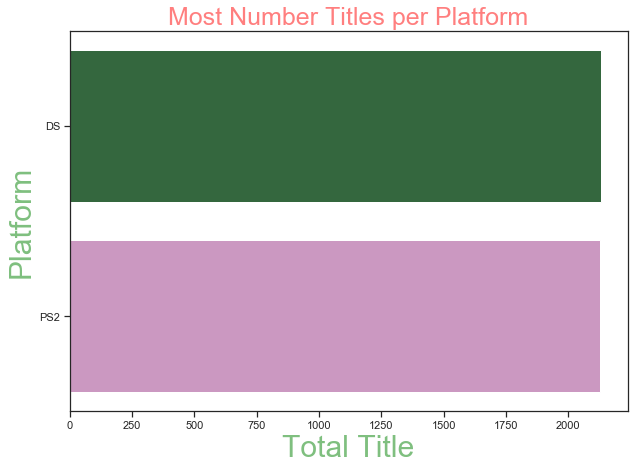

In [33]:
platform_title = df2.Platform.value_counts(sort=True)[:2]
plt.subplots(figsize=(10,7))
ax = sns.barplot(x=platform_title , y=platform_title .index, palette='cubehelix')
ax.set_title('Most Number Titles per Platform', color='red', alpha=0.5, size=25)
ax.set_xlabel('Total Title', color='green', alpha=0.5, size=30)
ax.set_ylabel('Platform', color='green', alpha=0.5, size=30)

In [34]:
#DS and PS2 seem to have the same number of Titles

In [35]:
#Let's see which one sells better

Text(0, 0.5, 'Sales')

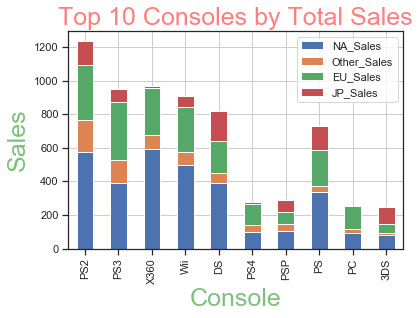

In [36]:
global_pub = df2.pivot_table(index=['Platform'], values=['Other_Sales','NA_Sales','EU_Sales','JP_Sales'],
                                          aggfunc=np.sum).sort_values(['Other_Sales'], ascending=False)
global_pub = global_pub[['NA_Sales','Other_Sales','EU_Sales','JP_Sales']]
ax = global_pub.iloc[0:10,:].plot(kind='bar', stacked=True, grid=True)
ax.set_title('Top 10 Consoles by Total Sales', size=25, color='red', alpha=0.5)
ax.set_xlabel('Console', size=25, color='green', alpha=0.5)
ax.set_ylabel('Sales', size=25, color='green', alpha=0.5)

In [37]:
#PS2 sells better

In [38]:
#Since PS2 has the most sales, does that mean Sony (the Publisher of PS2) is the best publisher in terms of sales?

Text(0, 0.5, 'Sales')

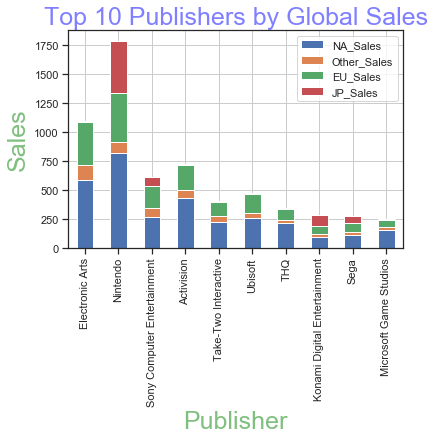

In [39]:
global_sales_publisher = df2.pivot_table(index=['Publisher'], values=['Other_Sales','NA_Sales','EU_Sales','JP_Sales'], 
                                           aggfunc=np.sum).sort_values(['Other_Sales'], ascending=False)
global_sales_publisher = global_sales_publisher[['NA_Sales','Other_Sales','EU_Sales','JP_Sales']]
ax = global_sales_publisher.iloc[0:10,:].plot(kind='bar', stacked=True, grid=True)
ax.set_title('Top 10 Publishers by Global Sales', size=25, color='blue', alpha=0.5)
ax.set_xlabel('Publisher', size=25, color='green', alpha=0.5)
ax.set_ylabel('Sales', size=25, color='green', alpha=0.5)

In [40]:
#Even though PS2 sells better than DS, Nintendo has higher sales than Sony. Why?

In [41]:
#Nintendo has a high proportion of Japan Sales compared to the other Publishers

In [42]:
#sns.set(rc={'figure.figsize':(50,15)})
#sns.scatterplot(x ='Publisher', y ='JP_Sales', data = df2)

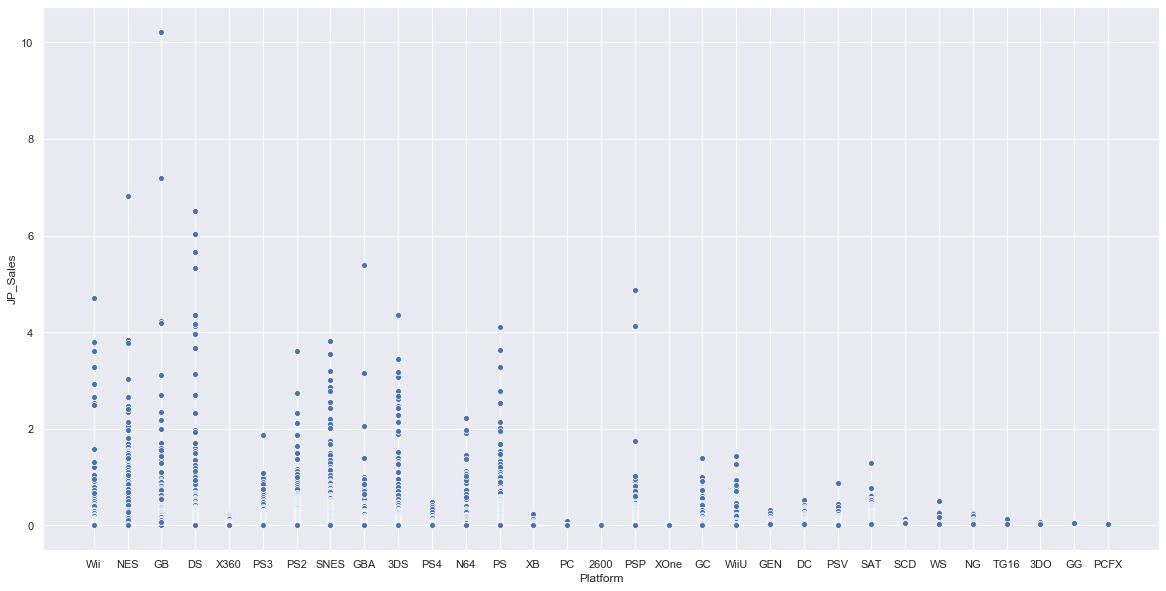

In [43]:
sns.set(rc={'figure.figsize':(20,10)})
sns.scatterplot(x ='Platform', y ='JP_Sales', data = df2)

In [44]:
#GB seems to have one outlier, with a sales value drastically larger than the others

In [45]:
df_GB = df2.loc[df2['Platform']=="GB"]

In [46]:
df_GB.sort_values(['Other_Sales'], ascending=False)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
132,133,Pokémon Crystal Version,GB,2000.0,Role-Playing,Nintendo,2.55,1.56,1.29,0.99,6.39
12,13,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10
30,31,Pokémon Yellow: Special Pikachu Edition,GB,1998.0,Role-Playing,Nintendo,5.89,5.04,3.12,0.59,14.64
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
21,22,Super Mario Land,GB,1989.0,Platform,Nintendo,10.83,2.71,4.18,0.42,18.14
391,392,F-1 Race,GB,1990.0,Racing,Nintendo,1.73,0.69,0.59,0.40,3.41
455,456,Donkey Kong,GB,1994.0,Platform,Nintendo,1.57,0.62,0.55,0.34,3.07
50,51,Super Mario Land 2: 6 Golden Coins,GB,1992.0,Adventure,Nintendo,6.16,2.04,2.69,0.29,11.18
736,738,Wario Land 3,GB,2000.0,Platform,Nintendo,1.11,0.51,0.34,0.23,2.20


In [47]:
#That one outlier is Pokemon Red/Blue

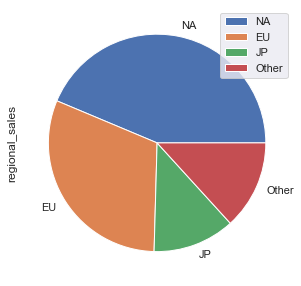

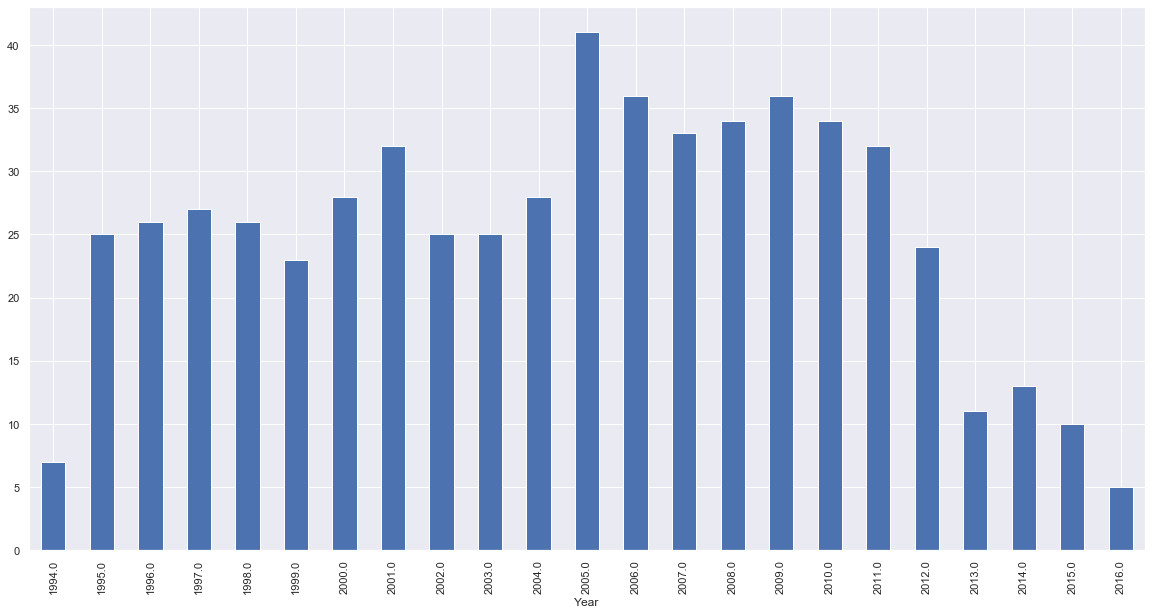

In [91]:
sony = df2.loc[df2['Publisher']=="Sony Computer Entertainment"]
na_sales_sum=sony['NA_Sales'].sum()
eu_sales_sum=sony['EU_Sales'].sum()
jp_sales_sum=sony['JP_Sales'].sum()
other_sales_sum=sony['Other_Sales'].sum()
total_sales_sum=sony['Global_Sales'].sum()
type(na_sales_sum)
pie_df=pd.DataFrame({'regional_sales':[na_sales_sum,eu_sales_sum,jp_sales_sum,other_sales_sum]},index=['NA','EU','JP','Other']);
plot = pie_df.plot.pie(y='regional_sales', figsize=(5, 5))
plt.show()
sales_per_year = sony.groupby('Year')['Global_Sales'].nunique().plot(kind='bar')
plt.show()

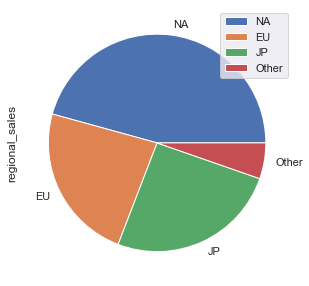

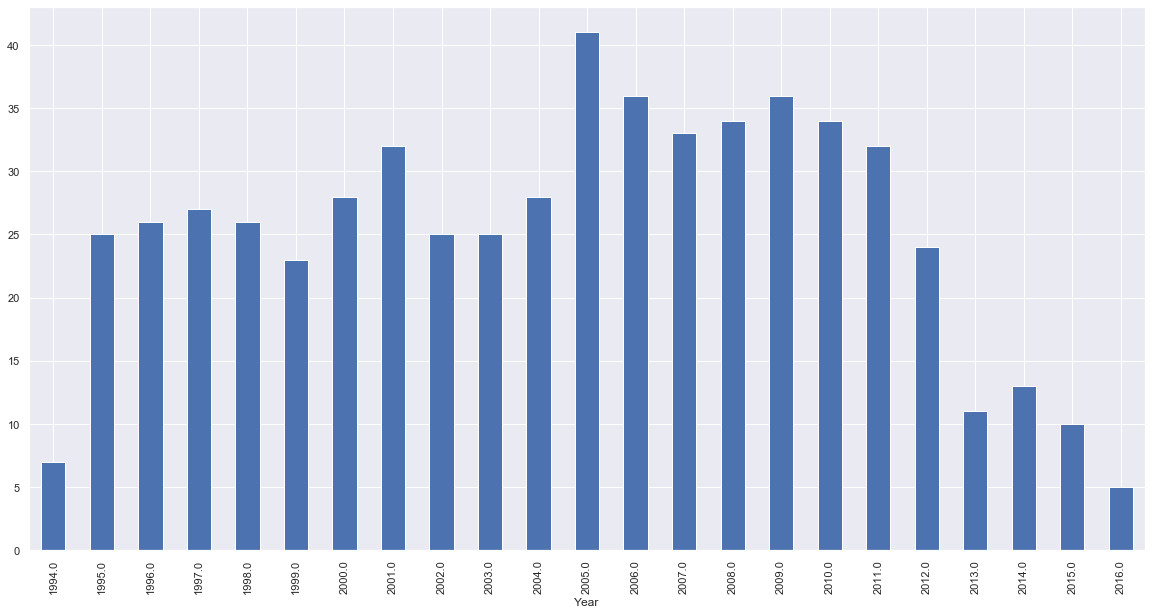

In [88]:
nintendo=df2.loc[df2['Publisher']=="Nintendo"]
na_sales_sum=nintendo['NA_Sales'].sum()
eu_sales_sum=nintendo['EU_Sales'].sum()
jp_sales_sum=nintendo['JP_Sales'].sum()
other_sales_sum=nintendo['Other_Sales'].sum()
total_sales_sum=nintendo['Global_Sales'].sum()
pie_df=pd.DataFrame({'regional_sales':[na_sales_sum,eu_sales_sum,jp_sales_sum,other_sales_sum]},index=['NA','EU','JP','Other']);
plot = pie_df.plot.pie(y='regional_sales', figsize=(5, 5))
plt.show()
sales_per_year = sony.groupby('Year')['Global_Sales'].nunique().plot(kind='bar')
plt.show()

In [89]:
#Most of Nintendo's market is in North America
#Globally, Nintendo sold the most number of units in 2005

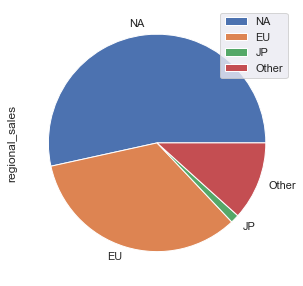

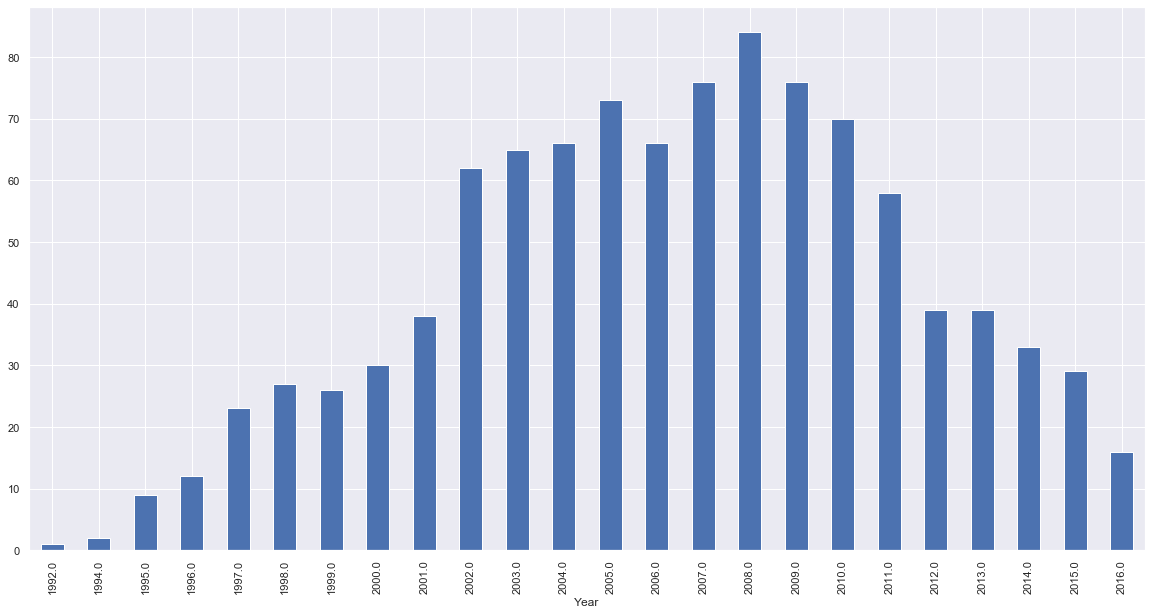

In [79]:
ea=df2.loc[df2['Publisher']=="Electronic Arts"]
na_sales_sum=ea['NA_Sales'].sum()
eu_sales_sum=ea['EU_Sales'].sum()
jp_sales_sum=ea['JP_Sales'].sum()
other_sales_sum=ea['Other_Sales'].sum()
total_sales_sum=ea['Global_Sales'].sum()
pie_df=pd.DataFrame({'regional_sales':[na_sales_sum,eu_sales_sum,jp_sales_sum,other_sales_sum]},index=['NA','EU','JP','Other']);
plot = pie_df.plot.pie(y='regional_sales', figsize=(5, 5))
plt.show()
sales_per_year = ea.groupby('Year')['Global_Sales'].nunique().plot(kind='bar')

In [90]:
#Most of EA's market is in North America
#Globally, EA sold the most number of units in 2008

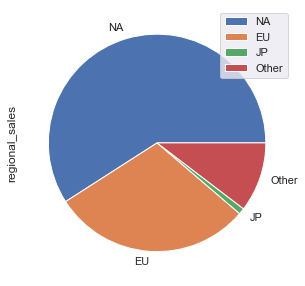

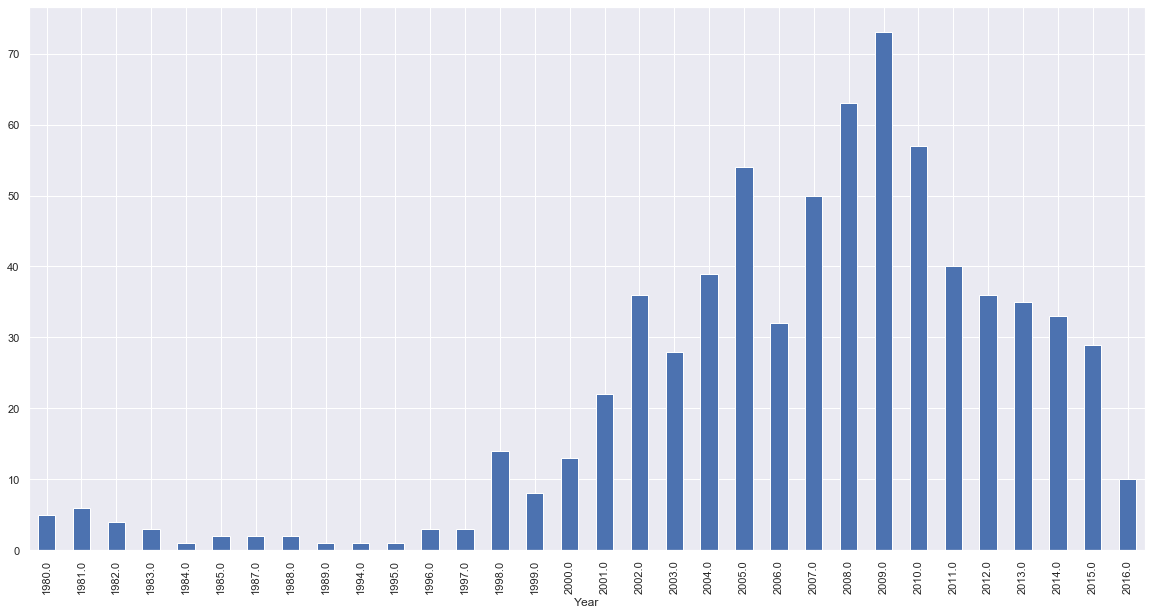

In [80]:
activision=df2.loc[df2['Publisher']=="Activision"]
na_sales_sum=activision['NA_Sales'].sum()
eu_sales_sum=activision['EU_Sales'].sum()
jp_sales_sum=activision['JP_Sales'].sum()
other_sales_sum=activision['Other_Sales'].sum()
total_sales_sum=activision['Global_Sales'].sum()
pie_df=pd.DataFrame({'regional_sales':[na_sales_sum,eu_sales_sum,jp_sales_sum,other_sales_sum]},index=['NA','EU','JP','Other']);
plot = pie_df.plot.pie(y='regional_sales', figsize=(5, 5))
plt.show()
sales_per_year = activision.groupby('Year')['Global_Sales'].nunique().plot(kind='bar')

In [ ]:
#Most of Activision's market is in North America
#Globally, Activision sold the most number of units in 2009

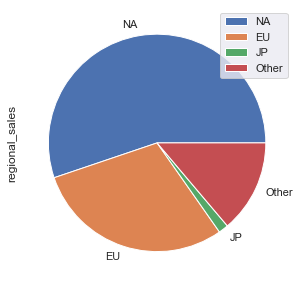

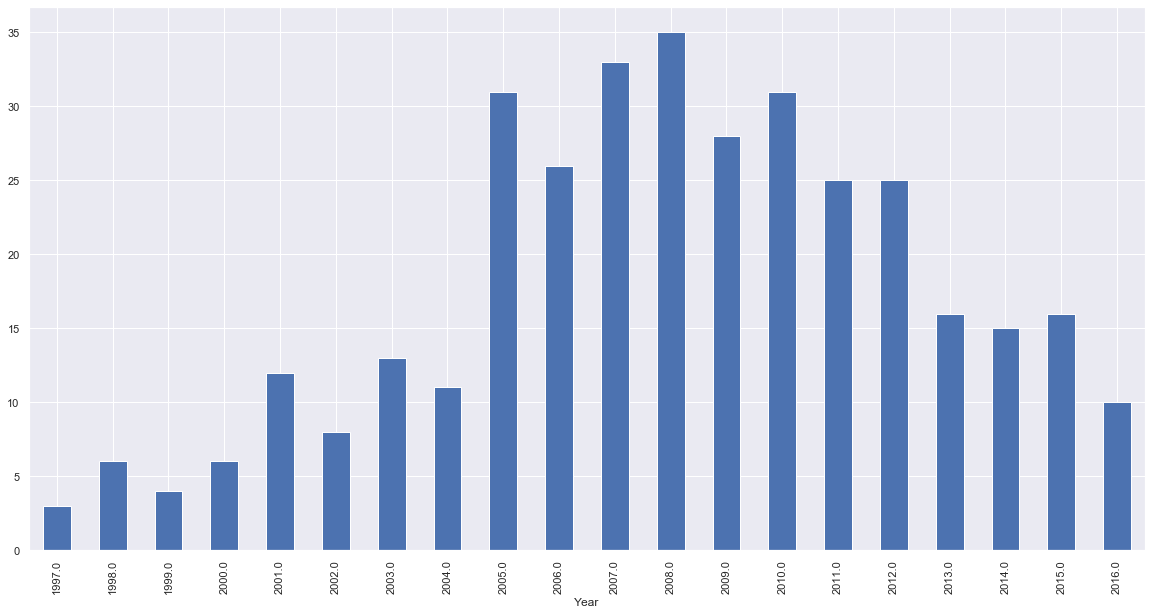

In [81]:
t2i=df2.loc[df2['Publisher']=="Take-Two Interactive"]
na_sales_sum=t2i['NA_Sales'].sum()
eu_sales_sum=t2i['EU_Sales'].sum()
jp_sales_sum=t2i['JP_Sales'].sum()
other_sales_sum=t2i['Other_Sales'].sum()
total_sales_sum=t2i['Global_Sales'].sum()
pie_df=pd.DataFrame({'regional_sales':[na_sales_sum,eu_sales_sum,jp_sales_sum,other_sales_sum]},index=['NA','EU','JP','Other']);
plot = pie_df.plot.pie(y='regional_sales',figsize=(5, 5))
plt.show()
sales_per_year = t2i.groupby('Year')['Global_Sales'].nunique().plot(kind='bar')

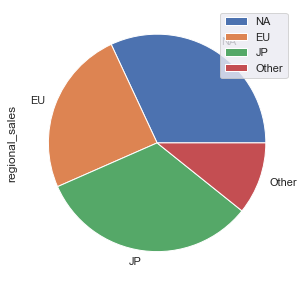

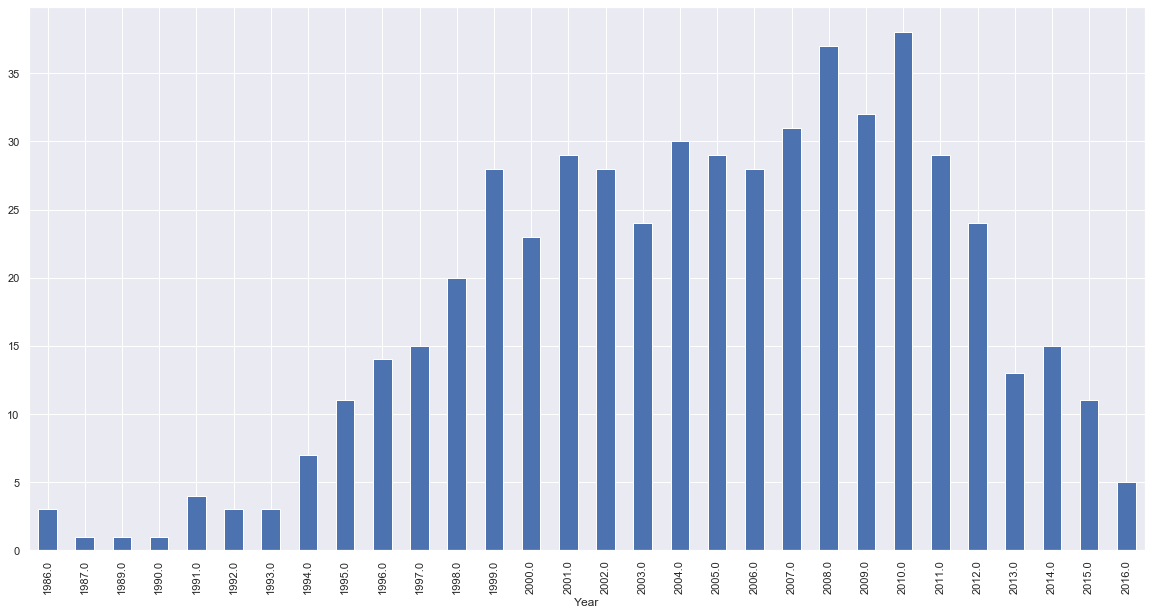

In [82]:
kde=df2.loc[df2['Publisher']=="Konami Digital Entertainment"]
na_sales_sum=kde['NA_Sales'].sum()
eu_sales_sum=kde['EU_Sales'].sum()
jp_sales_sum=kde['JP_Sales'].sum()
other_sales_sum=kde['Other_Sales'].sum()
total_sales_sum=kde['Global_Sales'].sum()
pie_df=pd.DataFrame({'regional_sales':[na_sales_sum,eu_sales_sum,jp_sales_sum,other_sales_sum]},index=['NA','EU','JP','Other']);
plot = pie_df.plot.pie(y='regional_sales',figsize=(5, 5))
plt.show()
sales_per_year = kde.groupby('Year')['Global_Sales'].nunique().plot(kind='bar')

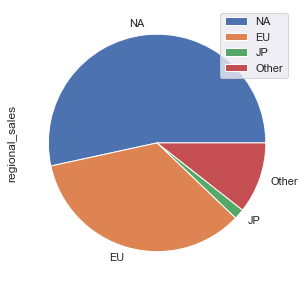

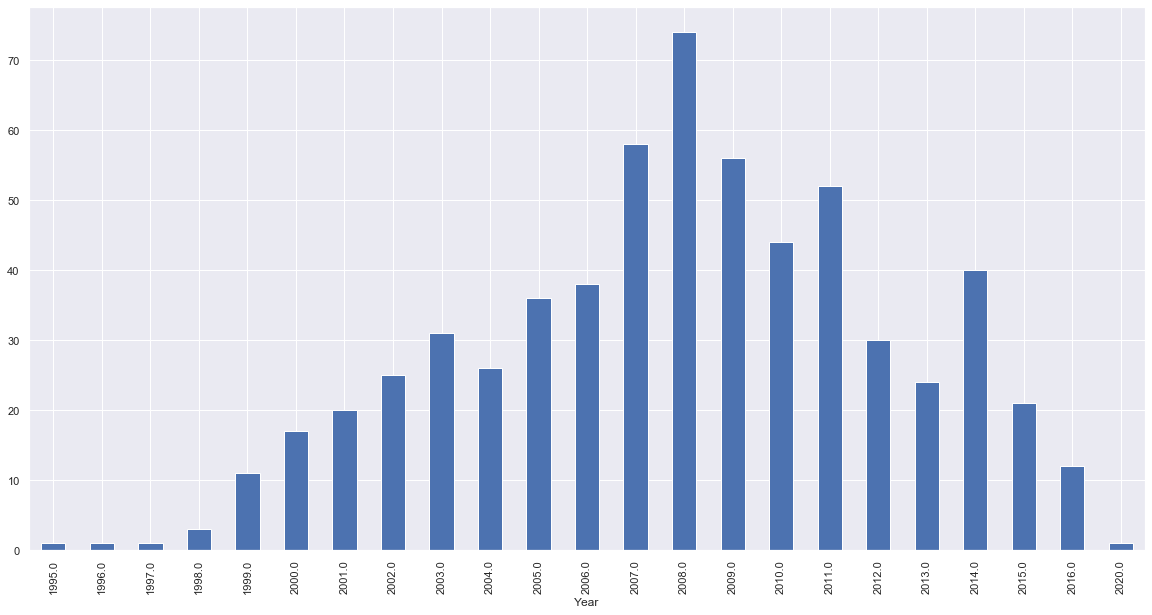

In [83]:
ubisoft=df2.loc[df2['Publisher']=="Ubisoft"]
na_sales_sum=ubisoft['NA_Sales'].sum()
eu_sales_sum=ubisoft['EU_Sales'].sum()
jp_sales_sum=ubisoft['JP_Sales'].sum()
other_sales_sum=ubisoft['Other_Sales'].sum()
total_sales_sum=ubisoft['Global_Sales'].sum()
pie_df=pd.DataFrame({'regional_sales':[na_sales_sum,eu_sales_sum,jp_sales_sum,other_sales_sum]},index=['NA','EU','JP','Other']);
plot = pie_df.plot.pie(y='regional_sales',figsize=(5, 5))
plt.show()
sales_per_year = ubisoft.groupby('Year')['Global_Sales'].nunique().plot(kind='bar')

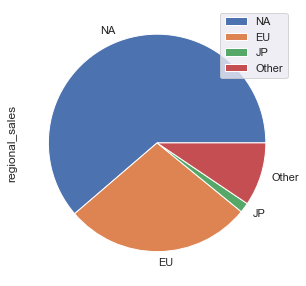

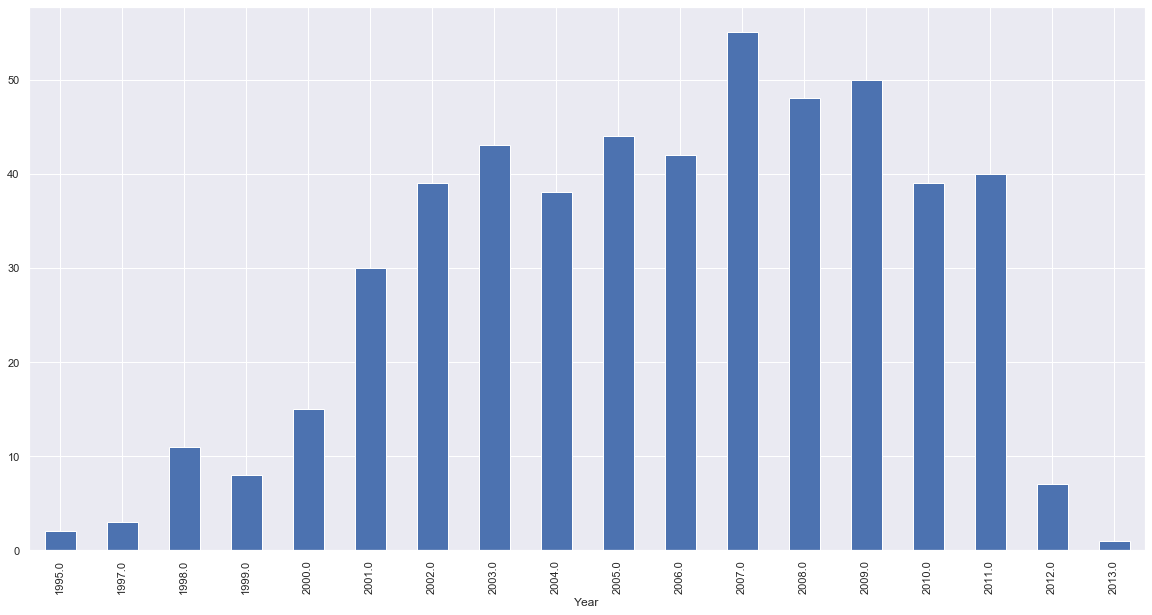

In [84]:
thq=df2.loc[df2['Publisher']=="THQ"]
na_sales_sum=thq['NA_Sales'].sum()
eu_sales_sum=thq['EU_Sales'].sum()
jp_sales_sum=thq['JP_Sales'].sum()
other_sales_sum=thq['Other_Sales'].sum()
total_sales_sum=thq['Global_Sales'].sum()
pie_df=pd.DataFrame({'regional_sales':[na_sales_sum,eu_sales_sum,jp_sales_sum,other_sales_sum]},index=['NA','EU','JP','Other']);
plot = pie_df.plot.pie(y='regional_sales',figsize=(5, 5))
plt.show()
sales_per_year = thq.groupby('Year')['Global_Sales'].nunique().plot(kind='bar')

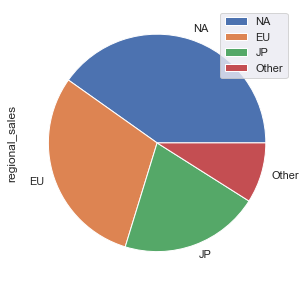

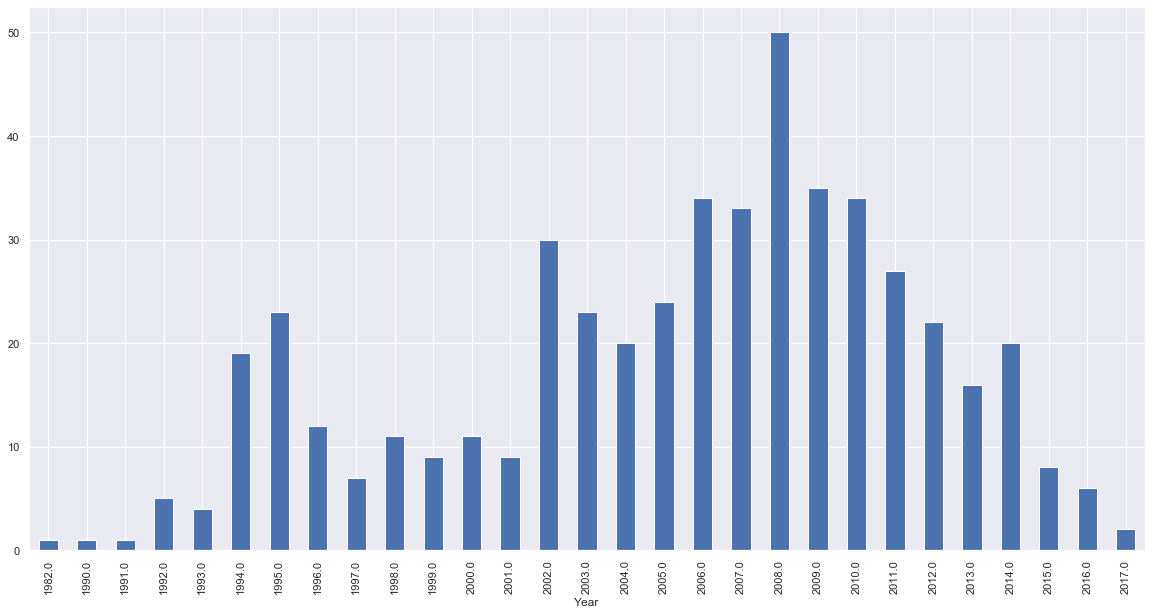

In [85]:
sega=df2.loc[df2['Publisher']=="Sega"]
na_sales_sum=sega['NA_Sales'].sum()
eu_sales_sum=sega['EU_Sales'].sum()
jp_sales_sum=sega['JP_Sales'].sum()
other_sales_sum=sega['Other_Sales'].sum()
total_sales_sum=sega['Global_Sales'].sum()
pie_df=pd.DataFrame({'regional_sales':[na_sales_sum,eu_sales_sum,jp_sales_sum,other_sales_sum]},index=['NA','EU','JP','Other']);
plot = pie_df.plot.pie(y='regional_sales',figsize=(5, 5))
plt.show()
sales_per_year = sega.groupby('Year')['Global_Sales'].nunique().plot(kind='bar')

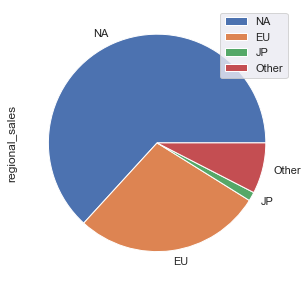

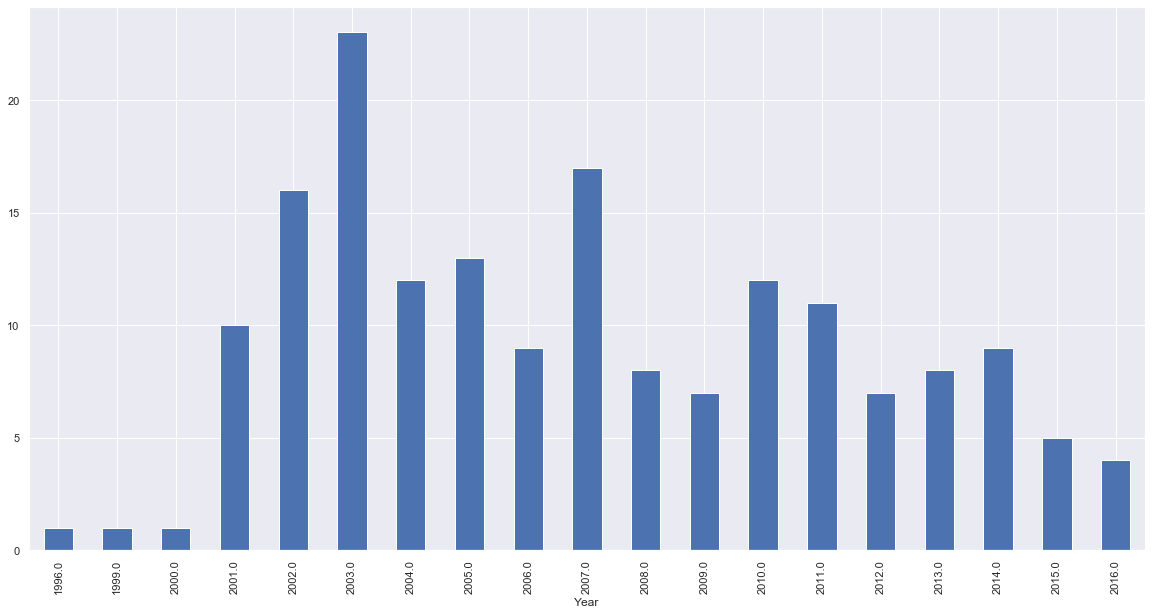

In [86]:
msgs=df2.loc[df2['Publisher']=="Microsoft Game Studios"]
na_sales_sum=msgs['NA_Sales'].sum()
eu_sales_sum=msgs['EU_Sales'].sum()
jp_sales_sum=msgs['JP_Sales'].sum()
other_sales_sum=msgs['Other_Sales'].sum()
total_sales_sum=msgs['Global_Sales'].sum()
pie_df=pd.DataFrame({'regional_sales':[na_sales_sum,eu_sales_sum,jp_sales_sum,other_sales_sum]},index=['NA','EU','JP','Other']);
plot = pie_df.plot.pie(y='regional_sales',figsize=(5, 5))
plt.show()
sales_per_year = msgs.groupby('Year')['Global_Sales'].nunique().plot(kind='bar')